In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
city_data = []

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-18.036090865033515 -154.0732918599146
48.70892811103366 173.43509194491526
49.543838202864094 29.499892295041548
-76.69396483184299 -73.66143609732669
-75.16054402106113 -158.7239474309523
-56.05025200061517 5.394337066192151
13.3306858854111 -40.22333132132033
23.487440701735053 -146.79448846559566
-3.0802863640123803 -105.96058491692014
-43.609880451302246 73.81369672720743
80.0784355964899 58.26582948297619
3.389273999662862 34.1103657396757
60.04153520729713 24.222029607227228
20.604088120077606 66.53332055852303
15.959181847746592 -11.300208232719427
-50.68736768809777 -155.23493082738696
-58.81552256370372 160.3846560462759
34.06680077275362 -2.7229775047894123
-38.2193057063234 115.55504641882851
11.426382483584803 114.91339072893902
-32.521479616115485 -125.5107108780598
-13.616159523287777 106.47576571384377
51.55434850900082 -55.49369849488768
18.468397341271768 13.968640107980406
-84.32198708633015 -19.89071121063327
-9.33012145620205 142.71017340190434
67.2896955933229 -72

-48.190193292654115 -132.0267717712299
-23.51167809612768 95.0736389704619
32.17143859188572 -111.72621637616295
30.09200403340529 16.168227449477683
31.817917950603842 -150.57023795414156
71.36811584915424 9.155141948802964
13.364192648076894 -61.59329535297283
-34.396002294588875 66.04513791584355
-42.81486243307884 108.74901050522232
-22.618451430606527 114.99124896068861
88.8547915947579 101.39395064953595
75.30126207279642 -79.12743968175852
84.60126095793711 30.92023136483934
-13.768165756217286 20.357767409122232
39.14723951631149 121.8843869495388
85.23216695311817 -1.0084439463151966
33.023298791520304 -6.518349463736797
41.5171284756573 -153.42329554742284
44.59316723340049 -0.5296140152367173
-89.83665658677118 -78.65831580361314
-28.98940490913732 -170.99932606227733
41.0105457278045 -106.84881872059722
-62.22848634654413 159.60079469320618
66.40269109706952 143.63354452456457
-1.9723765667742725 -19.696095353947555
67.19809628496435 31.07619894130289
20.842140036999965 38.

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [8]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
city_data = []

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitape
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | tetiyiv
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | kaabong
Processing Record 13 of Set 1 | kirkkonummi
Processing Record 14 of Set 1 | dwarka
Processing Record 15 of Set 1 | kayes
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | nador
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ransang
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | kawalu
Processing Record 22 of Set 1 | saint anthony
Processing Record 23 of S

Processing Record 38 of Set 4 | bethal
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | helong
Processing Record 41 of Set 4 | eidfjord
Processing Record 42 of Set 4 | andra
Processing Record 43 of Set 4 | rio gallegos
Processing Record 44 of Set 4 | penzance
Processing Record 45 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 46 of Set 4 | puerto madero
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | lazaro cardenas
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | urengoy
Processing Record 3 of Set 5 | masvingo
Processing Record 4 of Set 5 | pakxan
Processing Record 5 of Set 5 | polovinnoye
Processing Record 6 of Set 5 | rock sound
Processing Record 7 of Set 5 | redondela
Processing Record 8 of Set 5 | alyangula
Processing Record 9 of Set 5 | svetlyy
Processing Record 10 of Set 5 | bath
P

Processing Record 29 of Set 8 | qaqortoq
Processing Record 30 of Set 8 | pacific grove
Processing Record 31 of Set 8 | khonuu
City not found. Skipping...
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | porto novo
Processing Record 34 of Set 8 | saint-leu
Processing Record 35 of Set 8 | bacsalmas
Processing Record 36 of Set 8 | nioro
Processing Record 37 of Set 8 | ziro
Processing Record 38 of Set 8 | ndago
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | belle fourche
Processing Record 41 of Set 8 | lac du bonnet
Processing Record 42 of Set 8 | nyanguge
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | puerto madryn
Processing Record 45 of Set 8 | yamada
Processing Record 46 of Set 8 | itatskiy
Processing Record 47 of Set 8 | waddan
Processing Record 48 of Set 8 | jutai
Processing Record 49 of Set 8 | manono
Processing Record 50 of Set 8 | leshukonskoye
Processing Record 1 of Set 9 | kuche
City not found. Skipping...
Pr

Processing Record 16 of Set 12 | verkh-usugli
Processing Record 17 of Set 12 | henties bay
Processing Record 18 of Set 12 | kastamonu
Processing Record 19 of Set 12 | riyadh
Processing Record 20 of Set 12 | karamay
City not found. Skipping...
Processing Record 21 of Set 12 | antofagasta
Processing Record 22 of Set 12 | igurusi
Processing Record 23 of Set 12 | brun
Processing Record 24 of Set 12 | anchorage
Processing Record 25 of Set 12 | mountain home
Processing Record 26 of Set 12 | rio grande
Processing Record 27 of Set 12 | pangoa
Processing Record 28 of Set 12 | russell
Processing Record 29 of Set 12 | gweta
Processing Record 30 of Set 12 | deputatskiy
Processing Record 31 of Set 12 | yerbogachen
Processing Record 32 of Set 12 | rumoi
Processing Record 33 of Set 12 | plouzane
Processing Record 34 of Set 12 | chapais
Processing Record 35 of Set 12 | baruun-urt
Processing Record 36 of Set 12 | itupiranga
Processing Record 37 of Set 12 | caledonia
Processing Record 38 of Set 12 | nou

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaitape,PF,2022-07-26 02:15:11,-16.5167,-151.7500,77.41,76,88,9.42
1,Nikolskoye,RU,2022-07-26 02:15:12,59.7035,30.7861,59.81,90,80,2.33
2,Tetiyiv,UA,2022-07-26 02:15:12,49.3767,29.6647,56.30,92,0,5.70
3,Ushuaia,AR,2022-07-26 02:15:13,-54.8000,-68.3000,35.26,69,40,18.41
4,Mataura,NZ,2022-07-26 02:15:13,-46.1927,168.8643,46.47,97,100,10.85
5,Cape Town,ZA,2022-07-26 02:14:19,-33.9258,18.4232,58.37,71,0,4.61
6,Cayenne,GF,2022-07-26 02:15:14,4.9333,-52.3333,83.08,9,20,2.30
7,Hilo,US,2022-07-26 02:11:53,19.7297,-155.0900,88.29,92,75,4.61
8,Puerto Ayora,EC,2022-07-26 02:15:14,-0.7393,-90.3518,70.56,94,98,5.01
9,Mahebourg,MU,2022-07-26 02:15:15,-20.4081,57.7000,68.29,88,40,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

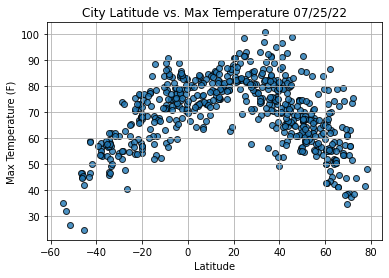

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

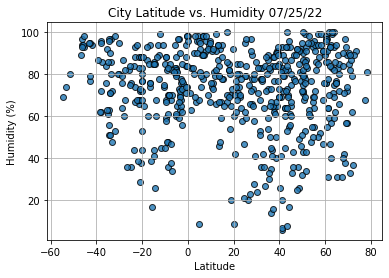

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

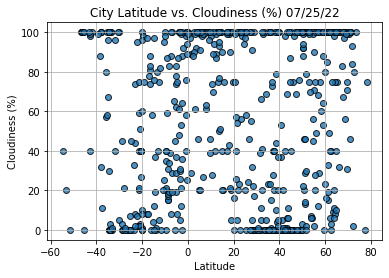

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

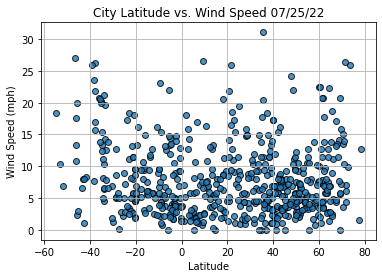

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()